* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-08-29


In [2]:
import pandas as pd
import numpy as np

In [3]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   59   46   99   86   86   110  131  266  101  123  197  170   86
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2  125  136  200  143   70   125  144  227  133  168  240  136  250,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    59   46   99   86   86  110
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   131  266  101  123  197  170
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4    86  125  136  200  143   70
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6   125  144  227  133  168  240
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   136  250  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  성북구사랑제일교회  용인시우리제일교회  노원구빛가온교회  성북구체대입시관련  구로구아파트관련  금천축산업계  \
 0  3657     384        588         72        20         35        11      22   
 
    광화문집회관련  순복음강북교회  강서구병원관련  극단'산'관련  여의도순복음교회  강동구어린이집  타 시·도확진자접촉자    기타  \
 0       77       17        7       30        27       17          142  1591   
 
    경로확인중  
 0    617  ,
                               

In [5]:
# index the table with covid19 patient data
tables[6]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3657,미부여,8.28.,기타,-,확인 중,NaN
1,3656,미부여,8.28.,기타,-,확인 중,NaN
2,3655,미부여,8.28.,기타,-,확인 중,NaN
3,3654,미부여,8.28.,기타,-,확인 중,NaN
4,3653,미부여,8.28.,기타,-,확인 중,NaN
...,...,...,...,...,...,...,...
3652,5,9,1.31.,성북구,-,#5 접촉,퇴원
3653,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
3654,3,6,1.30.,종로구,-,#3 접촉,퇴원
3655,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [6]:
# get number of confirmed cases and numbers of columns
df = tables[6]
df.shape

(3657, 7)

In [7]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3657,미부여,8.28.,기타,-,확인 중,NaN
1,3656,미부여,8.28.,기타,-,확인 중,NaN
2,3655,미부여,8.28.,기타,-,확인 중,NaN
3,3654,미부여,8.28.,기타,-,확인 중,NaN
4,3653,미부여,8.28.,기타,-,확인 중,NaN


In [10]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'8_28_'

In [11]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_8_28_.csv'

In [12]:
df.to_csv(file_path, index=False)

In [13]:
# reed the covid dataset
df = pd.read_csv(file_path)

In [29]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3232,18211,8.25.,광진구,-,기타(확진자) 접촉,NaN
1,3231,18216,8.25.,종로구,-,기타(확진자) 접촉,NaN
2,3230,18217,8.25.,종로구,-,기타(확진자) 접촉,NaN
3,3229,18232,8.25.,강남구,-,확인중,NaN
4,3228,18234,8.25.,강남구,-,기타(확진자) 접촉,NaN
5,3227,18219,8.25.,서초구,-,확인중,NaN
6,3226,18220,8.25.,서초구,-,확인중,NaN
7,3225,18222,8.25.,서초구,-,확인중,NaN
8,3224,18215,8.25.,성북구,-,확인중,NaN
9,3223,18200,8.25.,강동구,-,기타(확진자) 접촉,NaN


In [9]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(383, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
1091,2566,16564,8.20.,도봉구,-,기타도 확진자 접촉,NaN
90,3567,미부여,8.28.,서대문구,-,기타 확진자 접촉,NaN
94,3563,미부여,8.28.,광진구,-,기타 확진자 접촉,NaN
994,2663,16730,8.21.,성동구,-,기타 확진자 접촉,NaN
169,3488,18868,8.27.,송파구,-,기타 확진자 접촉,NaN
1032,2625,16900,8.21.,중랑구,-,기타 확진자 접촉,NaN
706,2951,17554,8.23.,성북구,-,기타 확진자 접촉,NaN
258,3399,18768,8.27.,강서구,-,기타 확진자 접촉,NaN
1583,2074,15458,8.16.,노원구,-,기타 확진자 접촉,NaN
24,3633,미부여,8.28.,중구,-,기타 확진자 접촉,NaN


In [35]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(df_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.head(5)

number of patients incurred from church: 24%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
13,3644,미부여,8.28.,관악구,-,성북구 사랑제일교회 관련,NaN
15,3642,미부여,8.28.,광진구,-,성북구 사랑제일교회 관련,NaN
18,3639,미부여,8.28.,송파구,-,용인시 우리제일교회 관련,NaN
29,3628,미부여,8.28.,성북구,-,성북구 사랑제일교회 관련,NaN
34,3623,미부여,8.28.,영등포구,-,용인시 우리제일교회 관련,NaN


In [83]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 8%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
18,3639,미부여,8.28.,송파구,-,용인시 우리제일교회 관련,NaN,2020-08-28,8,35,08-28
34,3623,미부여,8.28.,영등포구,-,용인시 우리제일교회 관련,NaN,2020-08-28,8,35,08-28
35,3622,미부여,8.28.,영등포구,-,용인시 우리제일교회 관련,NaN,2020-08-28,8,35,08-28
44,3613,미부여,8.28.,노원구,-,노원구 빛가온교회 관련,NaN,2020-08-28,8,35,08-28
63,3594,미부여,8.28.,중구,-,노원구 빛가온교회 관련,NaN,2020-08-28,8,35,08-28


In [36]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.26.    153
8.18.    151
8.27.    146
8.15.    146
8.22.    140
        ... 
2.7.       1
4.18.      1
5.17.      1
5.01.      1
4.19.      1
Name: 확진일, Length: 190, dtype: int64

In [37]:
df["확진일"].head(4)

0    8.28.
1    8.28.
2    8.28.
3    8.28.
Name: 확진일, dtype: object

In [38]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-08-28
1   2020-08-28
2   2020-08-28
3   2020-08-28
4   2020-08-28
Name: 확진일자, dtype: datetime64[ns]

In [39]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [40]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [41]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,3657,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
1,3656,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
2,3655,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28


## Visualization

In [42]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [43]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

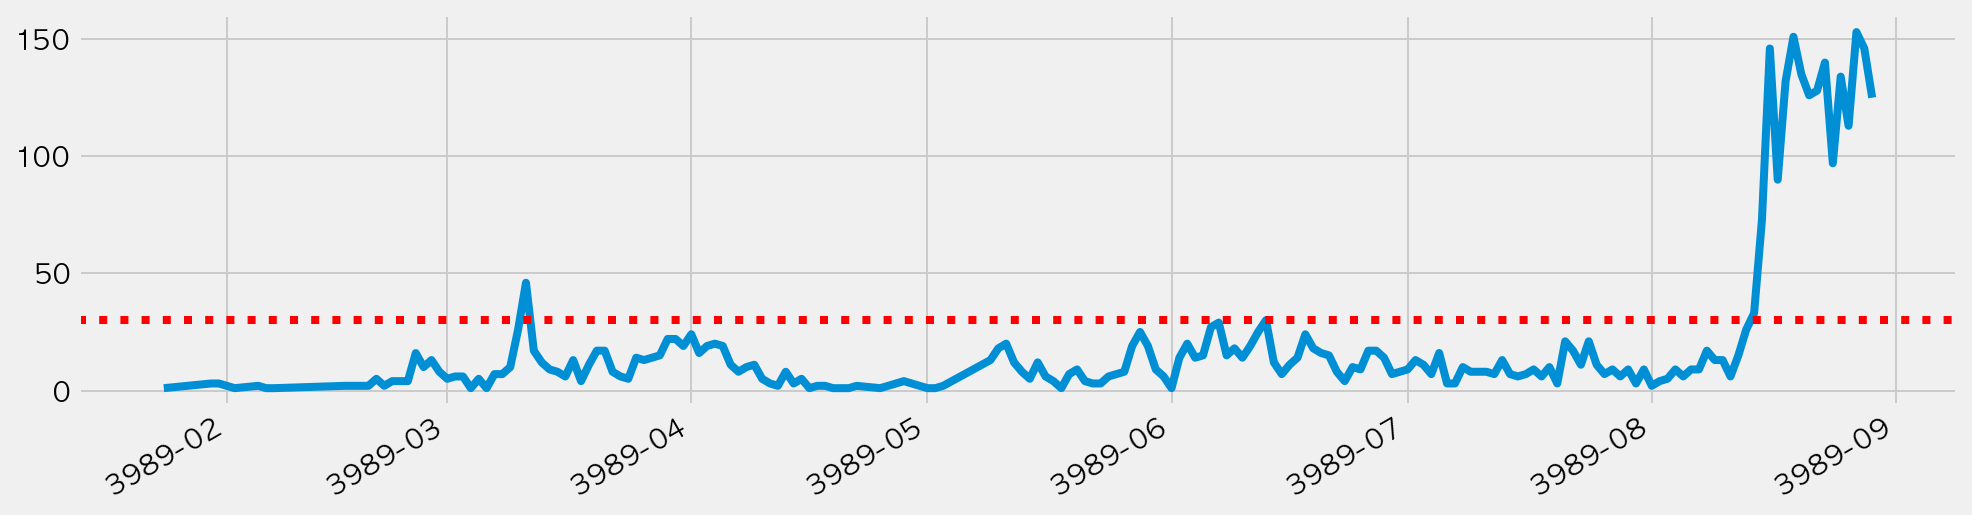

In [44]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [45]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,3657,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
1,3656,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
2,3655,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
3,3654,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
4,3653,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
5,3652,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
6,3651,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
7,3650,미부여,8.28.,양천구,-,확인 중,NaN,2020-08-28,8,35,08-28
8,3649,미부여,8.28.,강동구,-,기타 확진자 접촉,NaN,2020-08-28,8,35,08-28
9,3648,미부여,8.28.,강동구,-,기타 확진자 접촉,NaN,2020-08-28,8,35,08-28


In [46]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    189.000000
mean      19.349206
std       32.820835
min        1.000000
25%        5.000000
50%        9.000000
75%       17.000000
max      153.000000
Name: 월일, dtype: float64

In [47]:
# get 10 days of recent confirmed cases
day_count[-10:]

08-19    135
08-20    126
08-21    128
08-22    140
08-23     97
08-24    134
08-25    113
08-26    153
08-27    146
08-28    125
Name: 월일, dtype: int64

In [48]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-26    153
Name: 월일, dtype: int64

In [49]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-24"]
df_day.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
537,3120,17828,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
538,3119,17903,8.24.,기타,-,광화문 집회 관련,NaN,2020-08-24,8,35,08-24
539,3118,17913,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
540,3117,17876,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
541,3116,17866,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
542,3115,미부여,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
543,3114,미부여,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
544,3113,미부여,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
545,3112,미부여,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
546,3111,미부여,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24


In [50]:
# Covid19 infection classified with patients' contact to the disease
df["접촉력"].value_counts().head(20)

확인 중             608
성북구 사랑제일교회 관련    575
해외 접촉 추정         361
기타 확진자 접촉        352
이태원 클럽 관련        139
리치웨이 관련          119
타시도 확진자 접촉       102
용인시 우리제일교회 관련     71
구로구 콜센터 관련        60
광화문 집회 관련         49
양천구 운동시설 관련       43
확인중               43
요양시설 관련           43
구로구 교회 관련         41
수도권 개척교회 관련       37
콜센터직원 접촉          37
강남구 사무실 관련        36
구로구 아파트 관련        33
왕성교회 관련           30
극단 산 관련           30
Name: 접촉력, dtype: int64

In [56]:
# get unique value for types of contagion route 
number_of_paths = len(df["접촉력"].unique())
print(f"Total number of paths for infection: {number_of_paths}")

Total number of paths for infection: 211


In [57]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [58]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [59]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,3657,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
1,3656,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
2,3655,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
3,3654,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
4,3653,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28


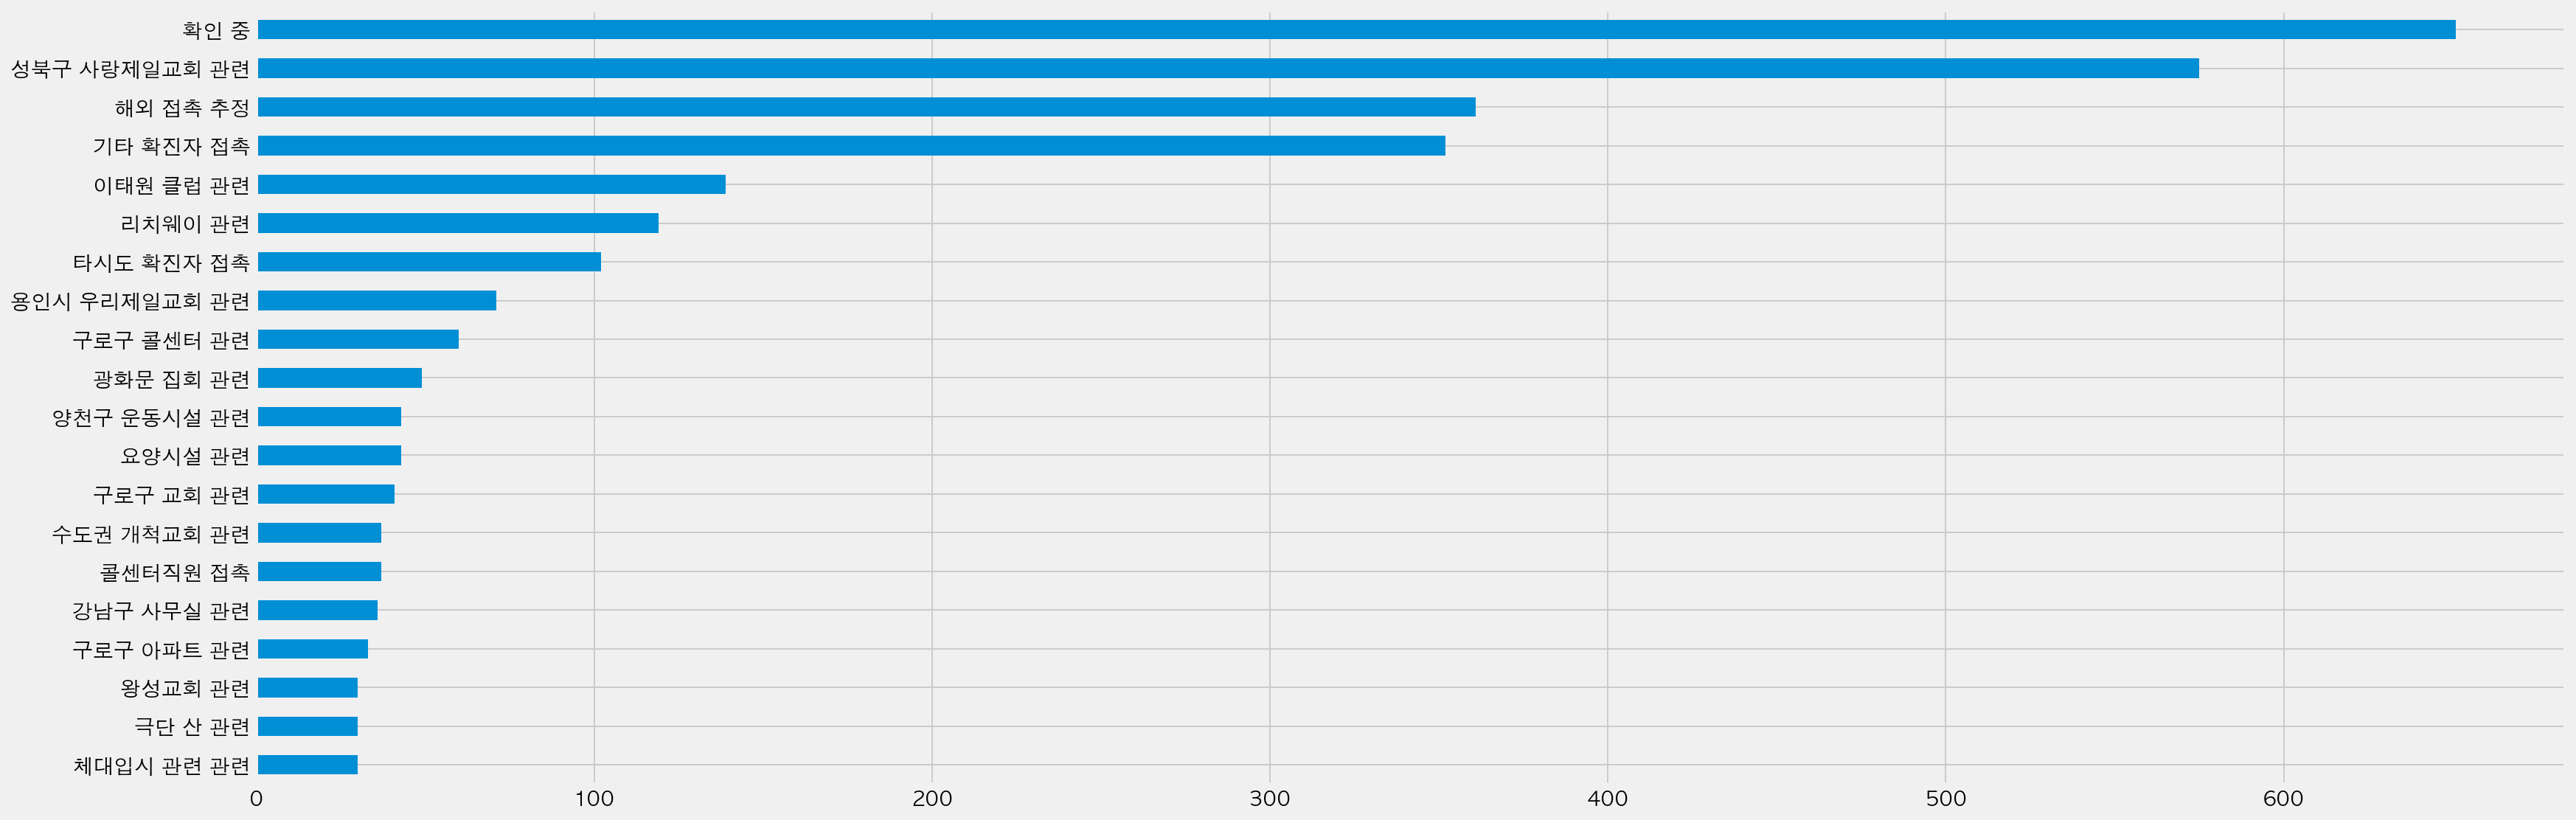

In [60]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [61]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [62]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

확인 중             651
성북구 사랑제일교회 관련    575
해외 접촉 추정         361
기타 확진자 접촉        352
이태원 클럽 관련        139
리치웨이 관련          119
타시도 확진자 접촉       102
용인시 우리제일교회 관련     71
구로구 콜센터 관련        60
광화문 집회 관련         49
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
수도권 개척교회 관련       37
콜센터직원 접촉          37
Name: 접촉력, dtype: int64

## 감염경로 불명

In [66]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,3657,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
1,3656,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
2,3655,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
3,3654,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
4,3653,미부여,8.28.,기타,-,확인 중,NaN,2020-08-28,8,35,08-28
...,...,...,...,...,...,...,...,...,...,...,...
3601,56,1611,2.25.,고양시,-,확인 중,퇴원,2020-02-25,2,9,02-25
3615,42,996,2.25.,노원구,-,확인 중,퇴원,2020-02-25,2,9,02-25
3618,39,907,2.25.,평택,-,확인 중,퇴원,2020-02-25,2,9,02-25
3619,38,935,2.25.,관악구,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

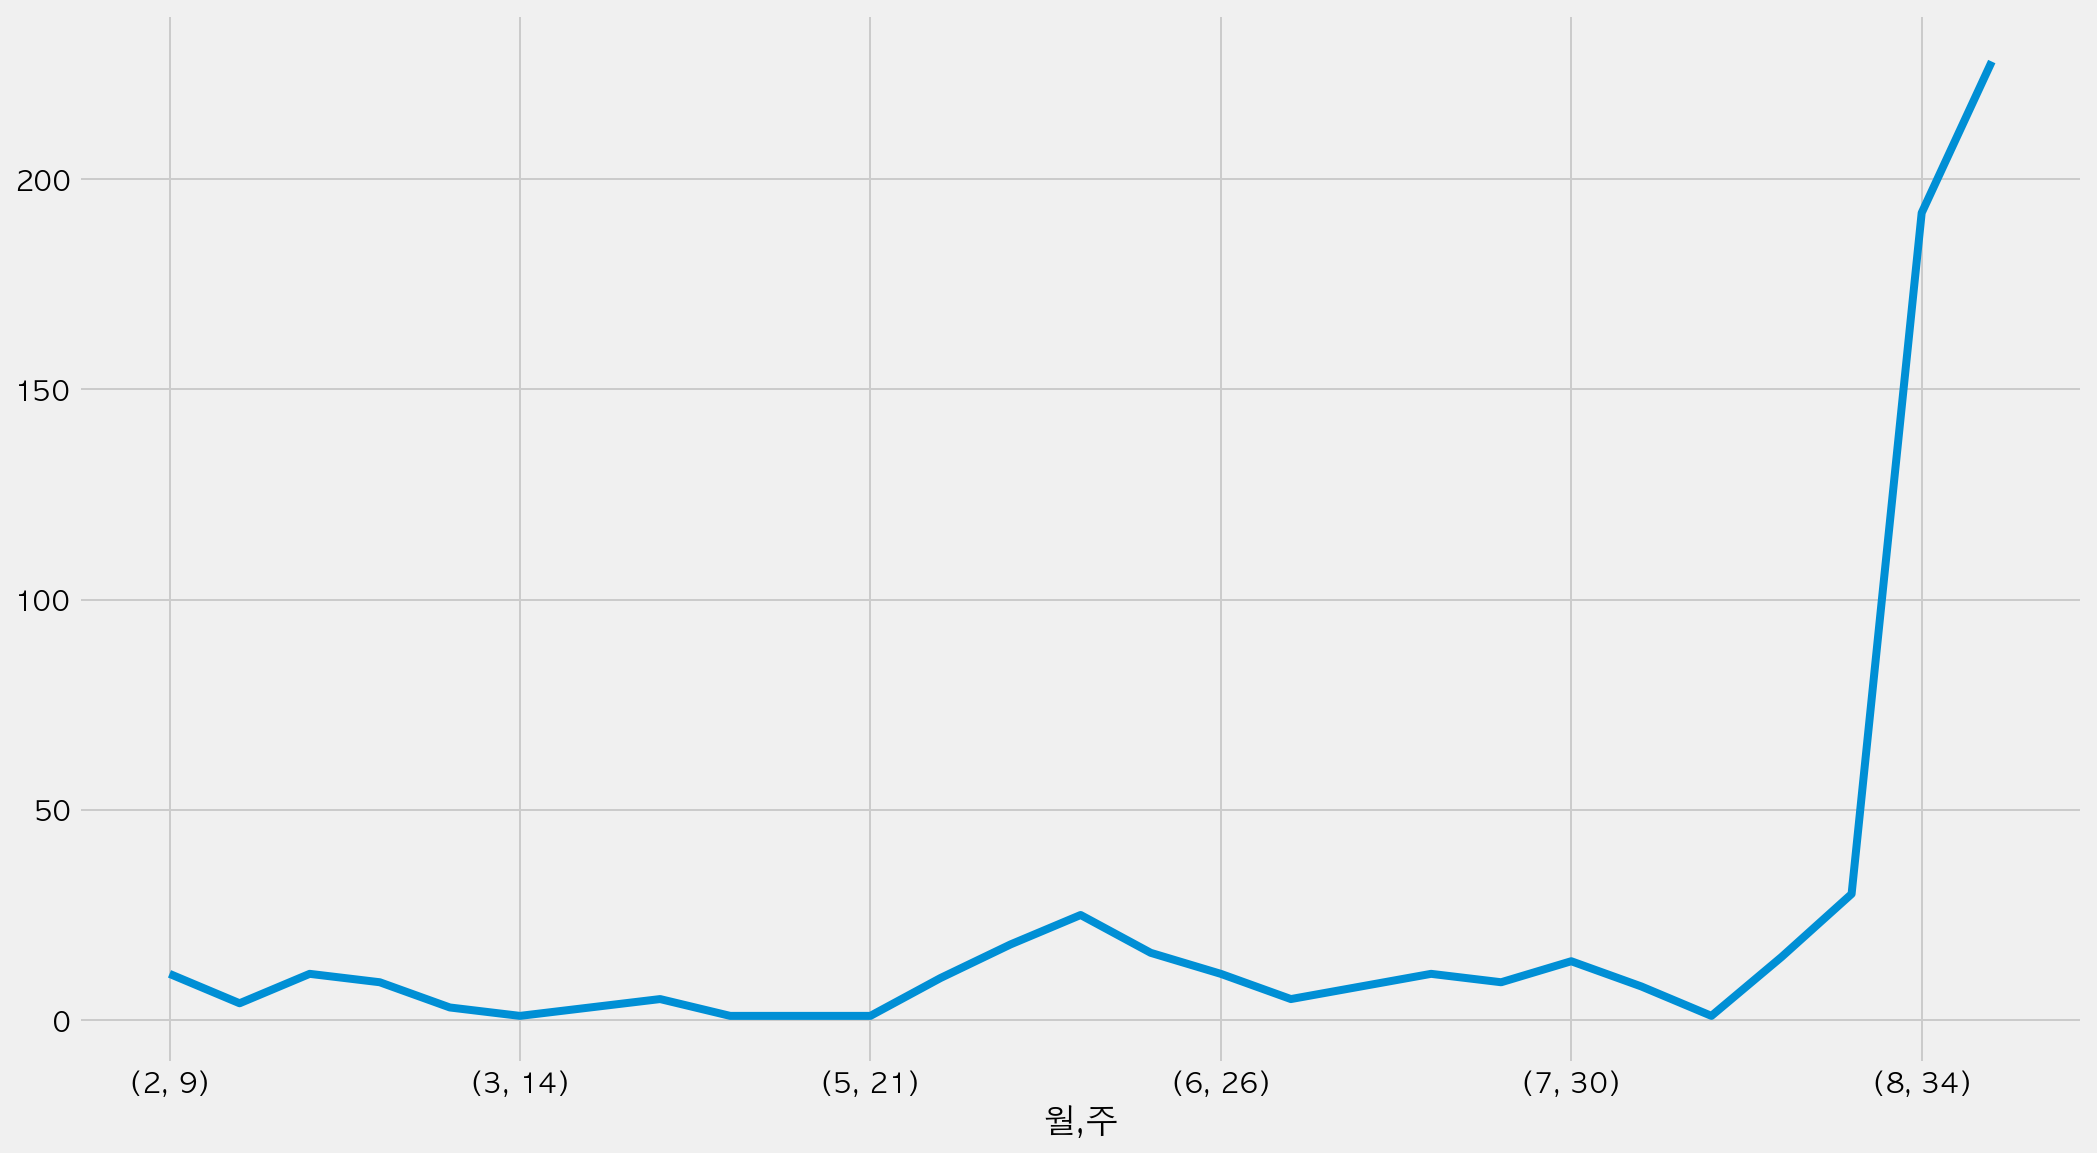

In [67]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [68]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
34,909
35,671
33,389
23,134
14,128


In [69]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
35,228
34,192
33,30
24,25
23,18


In [70]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [71]:
comparison[-4:]

,전체확진자수,불명확진수
32,76,15
33,389,30
34,909,192
35,671,228


<AxesSubplot:>

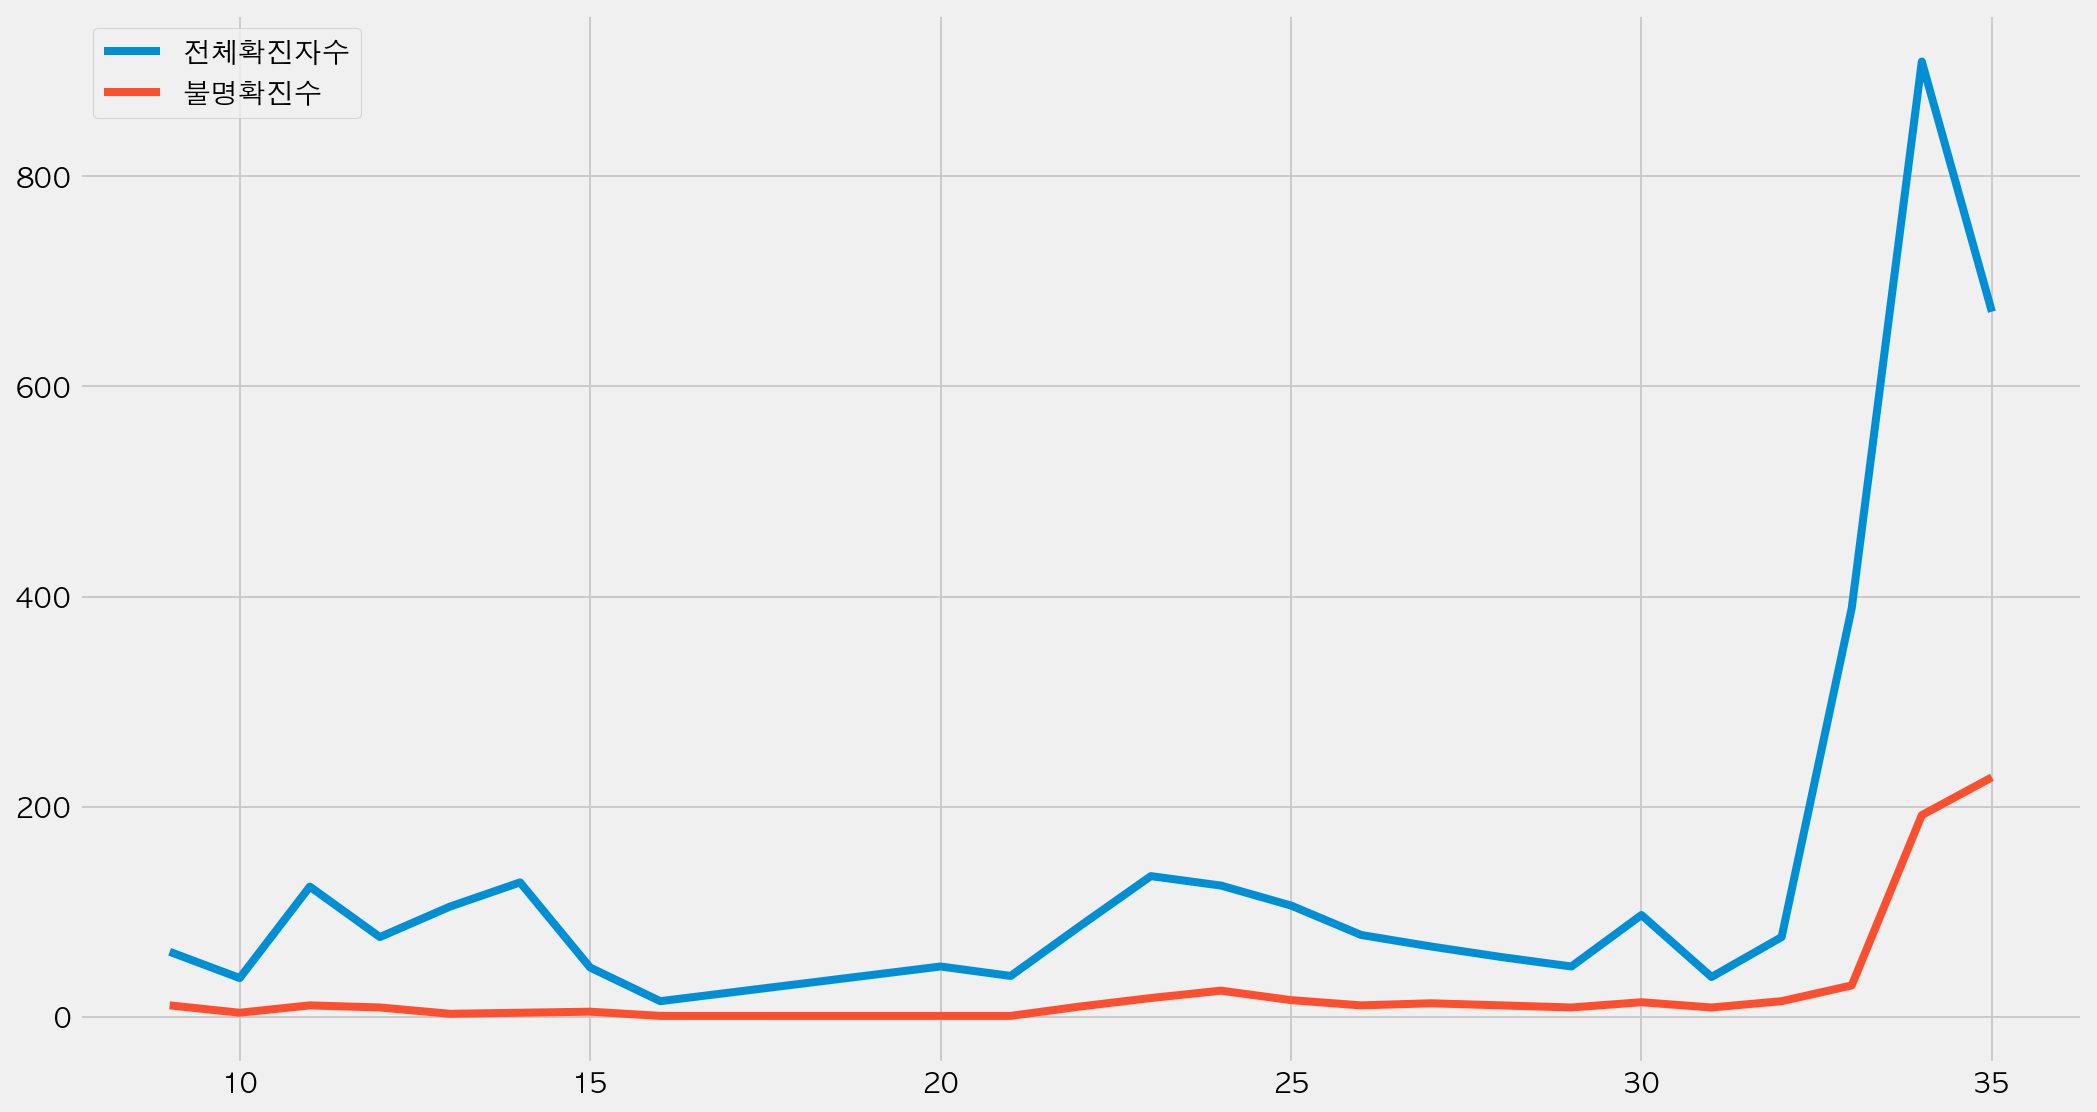

In [72]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [73]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [74]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    14.432990
31    23.684211
32    19.736842
33     7.712082
34    21.122112
35    33.979136
dtype: float64

In [75]:
percentages[-4:]

32    19.736842
33     7.712082
34    21.122112
35    33.979136
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
21.122112211221122
33.97913561847988


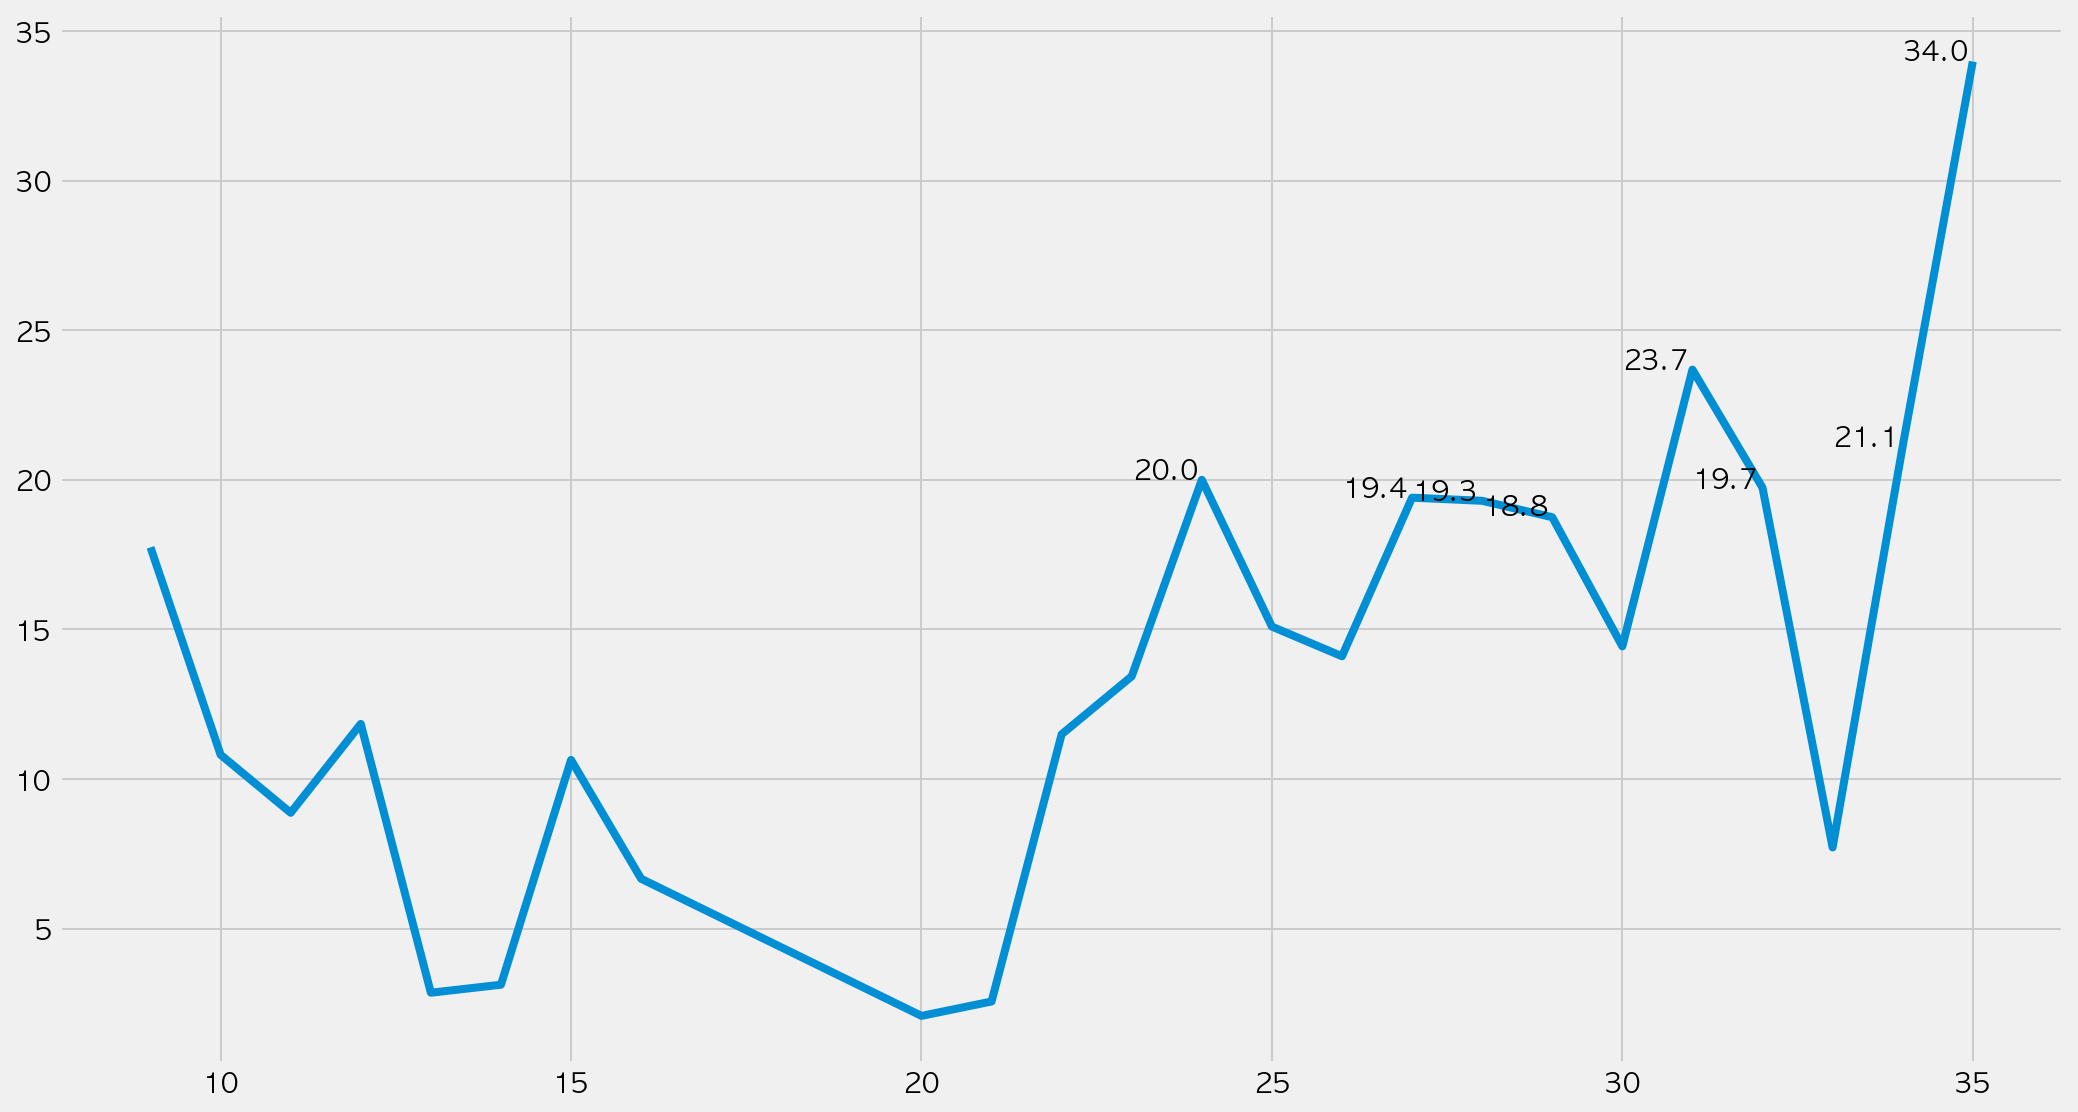

In [76]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [77]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')